In [1]:
from library import *
import numpy as np
import sympy as s
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import interactive
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
import math
import multiprocessing as multiproc
import datetime
from joblib import Parallel, delayed
from numba import jit
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap,TwoSlopeNorm
from IPython.display import display, Math

# 2D oscillator going in straigt line differnet frequencies with zero point energy

In [2]:
mu = [0.,0.]
phi = np.pi/5
r = np.sqrt(mu[1]**2+mu[0]**2)
p = np.array([np.cos(phi),np.sin(phi)])

l = [1.,1.]
w = np.array([1,1])
m = 1
h = 1
trajectories, psi_WKB_2D, X, Y, PSI_QM_2D = Harmonic_oscillator2D(p, mu,l, w, m, h, n_cutoff = 170, resolution = 300, zero_energey = True)

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
np.save('data/trajectories_CASE1.npy', trajectories)
np.save('data/psi_WKB_2D_CASE1.npy', psi_WKB_2D)
np.save('data/PSI_QM_2D_CASE1.npy', PSI_QM_2D)
np.save('data/X_CASE1.npy', X)
np.save('data/Y_CASE1.npy', Y)

<IPython.core.display.Javascript object>


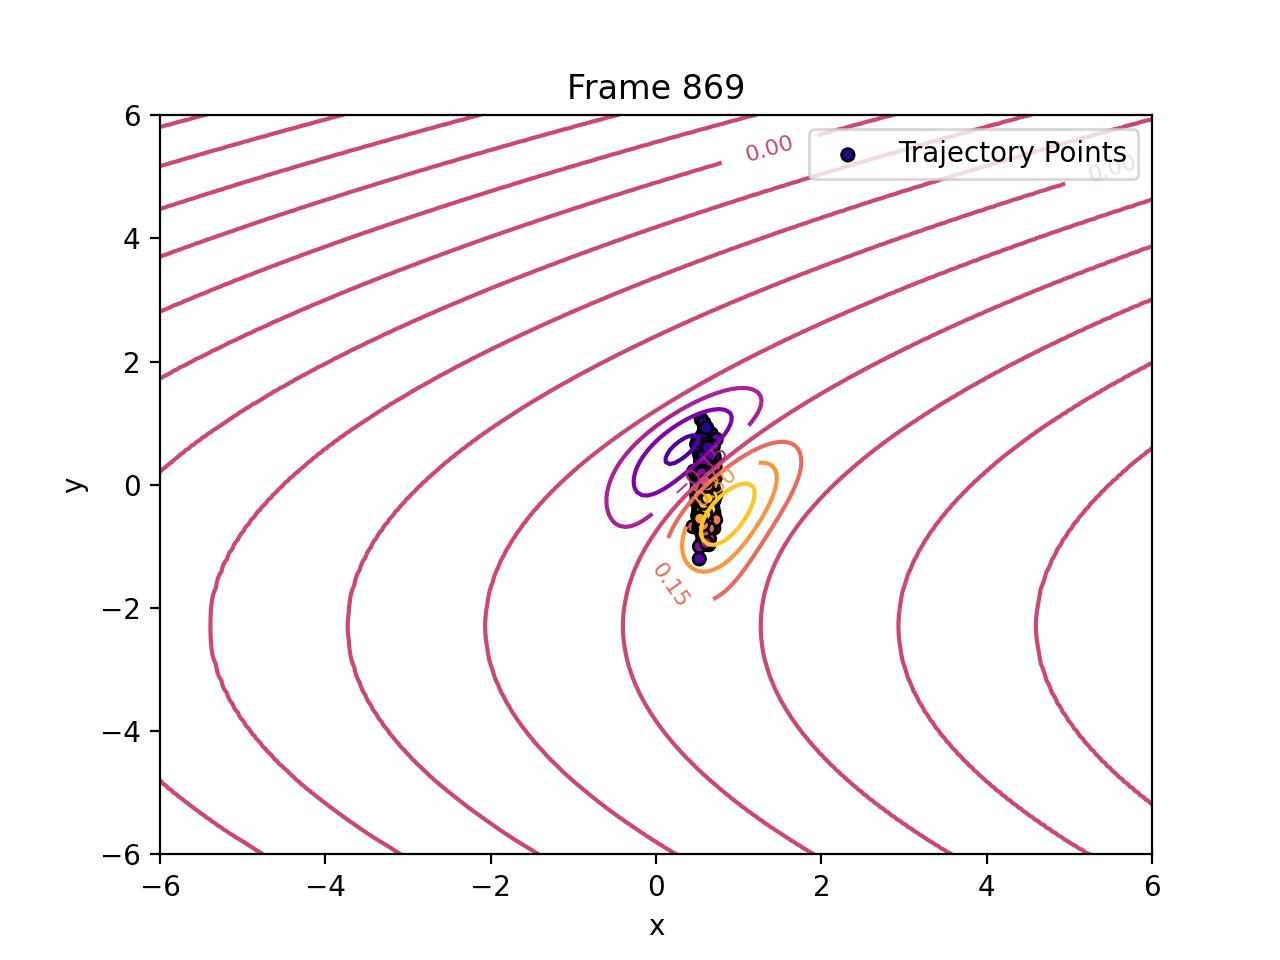

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot()

def _forward(x):
    return np.exp(-x**2)
def _inverse(x):
    return np.sqrt(np.log(x))

divnorm = matplotlib.colors.FuncNorm((_forward, _inverse), vmin=.000, vmax=1)

def animate(i):
    ax.clear()
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Plotting the contour lines
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, i]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)

    # Plotting scatter points
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[i, subset_indices])  # Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, i][:, 0], trajectories[subset_indices, i][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k', label='Trajectory Points')

    # Adding a colorbar for the scatter plot
    #fig.colorbar(scatter, ax=ax, label='Z-value', shrink=0.5)

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

    # Adding a legend
    ax.legend(loc='upper right')

    # Optionally, setting a title
    ax.set_title(f"Frame {i}")
ani = FuncAnimation(fig, animate, frames=int(20/0.01), interval=0.01, repeat=True)
#fig.colorbar(scatter, ax=ax, label='Z-value', shrink=0.5)

# 2D oscillator going in straigt line differnet frequencies without zero point energy

In [6]:
mu = [0.,0.]
phi = np.pi/5
r = np.sqrt(mu[1]**2+mu[0]**2)
p = np.array([np.cos(phi),np.sin(phi)])

l = [1.,1.]
w = np.array([1,1])
m = 1
h = 1
trajectories, psi_WKB_2D, X, Y, PSI_QM_2D = Harmonic_oscillator2D(p, mu,l, w, m, h, n_cutoff = 170, resolution = 300, zero_energey = False)

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
np.save('data/trajectories_CASE2.npy', trajectories)
np.save('data/psi_WKB_2D_CASE2.npy', psi_WKB_2D)
np.save('data/PSI_QM_2D_CASE2.npy', PSI_QM_2D)
np.save('data/X_CASE2.npy', X)
np.save('data/Y_CASE2.npy', Y)

## 2D oscillator going in circle differnet frequencies without zero point energy

In [2]:
mu = [1.,1.]
phi = np.arctan(mu[1]/mu[0])
r = np.sqrt(mu[1]**2+mu[0]**2)
p = r*np.array([-np.sin(phi),np.cos(phi)])

l = [1.,1.]
w = np.array([2,1])
m = 1
h = 1
trajectories, psi_WKB_2D, X, Y, PSI_QM_2D = Harmonic_oscillator2D(p, mu,l, w, m, h, n_cutoff = 170, resolution = 300, zero_energey = False)

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
np.save('data/trajectories_CASE3.npy', trajectories)
np.save('data/psi_WKB_2D_CASE3.npy', psi_WKB_2D)
np.save('data/PSI_QM_2D_CASE3.npy', PSI_QM_2D)
np.save('data/X_CASE3.npy', X)
np.save('data/Y_CASE3.npy', Y)

## 2D oscillator going in circle differnet frequencies with zero point energy

In [5]:
mu = [1.,1.]
phi = np.arctan(mu[1]/mu[0])
r = np.sqrt(mu[1]**2+mu[0]**2)
p = r*np.array([-np.sin(phi),np.cos(phi)])

l = [1.,1.]
w = np.array([2,1])
m = 1
h = 1
trajectories, psi_WKB_2D, X, Y, PSI_QM_2D = Harmonic_oscillator2D(p, mu,l, w, m, h, n_cutoff = 170, resolution = 300, zero_energey = True)

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
np.save('data/trajectories_CASE4.npy', trajectories)
np.save('data/psi_WKB_2D_CASE4.npy', psi_WKB_2D)
np.save('data/PSI_QM_2D_CASE4.npy', PSI_QM_2D)
np.save('data/X_CASE4.npy', X)
np.save('data/Y_CASE4.npy', Y)